In [1]:
import pandas as pd
import numpy as np
import re
import tqdm
from matplotlib._path import (affine_transform, count_bboxes_overlapping_bbox,
     update_path_extents)

C:\Users\P Abhi\Anaconda\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
dataset=pd.read_csv('dataset.csv')
dataset.dropna(inplace = True)
dataset.describe()

,id,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [3]:
dataset

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.groupby('class')['id'].nunique()

class
0     1430
1    19190
2     4163
Name: id, dtype: int64

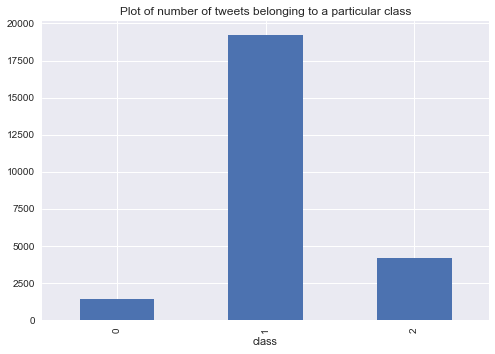

In [49]:
'''import matplotlib
import matplotlib.pyplot as plt
dataset.groupby('class')['id'].nunique().plot(kind='bar',title='Plot of number of tweets belonging to a particular class')
plt.show()'''

In [6]:
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\P
[nltk_data]     Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words= set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\P
[nltk_data]     Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def clean_tweet(tweet):
    tweet = re.sub('#',' ',tweet) # Removing '#' from hashtags
    tweet = re.sub("[^a-zA-Z#]", " ",tweet) # Removing punctuation and special characters
    tweet = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',"<URL>", tweet)
    tweet = re.sub('http','',tweet)
    tweet = re.sub(" +"," ", tweet)
    tweet = tweet.lower()
    tweet = word_tokenize(tweet)
    return_tweet=[]
    for word in tweet:
        if word not in stop_words:
            return_tweet.append(word)
    return return_tweet
dataset["tweet"]=dataset["tweet"].apply(clean_tweet)
dataset["tweet"][0]

['rt',
 'mayasolovely',
 'woman',
 'complain',
 'cleaning',
 'house',
 'amp',
 'man',
 'always',
 'take',
 'trash']

In [11]:
model = Word2Vec(dataset["tweet"].values, window=5, min_count=1, workers=4)

In [12]:
def get_features(tweet):
    features=[]
    for word in tweet:
        features.append(model.wv[word])
    return np.mean(features,0)

In [13]:
dataset["features"]=dataset["tweet"].apply(get_features)
dataset["features"].values

array([array([ 0.11553738,  1.0395324 ,  0.25051385, -0.13910814, -0.18682489,
       -0.44182733,  0.00234372, -0.93454725,  0.8147785 , -0.4162714 ,
       -1.5288483 , -0.9862829 ,  0.11369534,  0.41668895,  0.43517962,
        0.39352864, -0.08559679,  0.23901843,  1.1384119 , -0.98939055,
        0.3910118 , -0.8153619 , -1.2095758 , -0.51867944,  0.5443054 ,
        0.005813  ,  0.65393925, -0.5472073 , -0.79138875,  0.5202674 ,
        0.34038025,  0.20733218, -0.566524  , -0.4267394 ,  0.07485756,
       -0.802417  , -0.51955056, -0.03515605,  0.28506428, -0.5339573 ,
        0.35980514,  0.07314367,  1.2133036 , -0.3649437 , -0.58181006,
        0.10346469,  0.24456698, -0.24394354, -0.22124232,  0.15185012,
       -0.12077307, -0.88358045, -0.8025818 ,  0.5921378 , -1.117667  ,
        0.5601097 ,  0.04098319,  0.06106268,  0.9184685 ,  0.3080037 ,
        0.10585833, -0.50105196, -0.7664136 , -1.0180236 , -0.5792523 ,
       -0.71139807, -1.1394429 , -0.21704602, -0.8710811 

In [14]:
data=[]
for i in dataset["features"].values:
    temp=[]
    for j in i:
        temp.append(j)
    data.append(temp)
data=np.array(data)

In [15]:
from sklearn.preprocessing import label_binarize

Y = label_binarize(dataset["class"].values, classes=[0, 1, 2])
n_classes = Y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)

In [16]:
print(X_train)

[[ 0.07941091  0.7341237   0.16728203 ... -0.02503269 -0.35077545
   0.2838047 ]
 [ 0.08759803  0.8520452   0.16880365 ... -0.02511002 -0.408289
   0.3429183 ]
 [ 0.08024996  0.7380877   0.18470939 ... -0.03486289 -0.35558626
   0.28441766]
 ...
 [ 0.05364265  0.5668417   0.07539663 ...  0.00476483 -0.24167554
   0.19248688]
 [ 0.06184837  0.57758325  0.11678924 ... -0.00778304 -0.278493
   0.21842074]
 [ 0.12978868  1.0849097   0.3320349  ... -0.07269798 -0.5287537
   0.4324141 ]]


In [17]:
print(y_train)

[[1 0 0]
 [0 0 1]
 [0 1 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import multilabel_confusion_matrix
warnings.filterwarnings('ignore')

F1 Score:  0.8338150289017341
Precision Score:  0.8537307123229761
Recall Score:  0.8148073431510995
Accuracy:  0.81440387331047


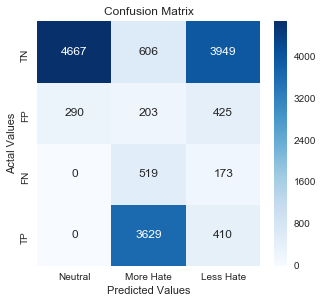

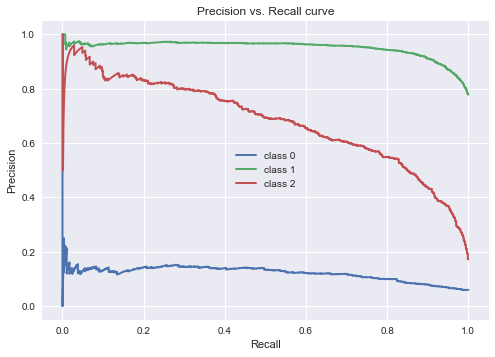

In [50]:
lr_clf = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'))
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", lr_clf.score(X_test,y_test))
cm = multilabel_confusion_matrix(y_test, y_pred)
names = ['x', 'y', 'z']
index = pd.MultiIndex.from_product([range(s)for s in cm.shape], names=names)
cm_df= pd.DataFrame({'A': cm.flatten()}, index=index)['A']
cm_df = cm_df.unstack(level='x').swaplevel().sort_index()
cm_df.columns = ['Neutral', 'More Hate', 'Less Hate']
cm_df.index=['TN','FP','FN','TP']
cm_df.index.names = ['value']
plt.figure(figsize=(5,4.5))
sns.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
y_score = lr_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "best")
plt.title("Precision vs. Recall curve")
plt.show()

In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

F1 Score:  0.843698175787728
Precision Score:  0.867618844596035
Recall Score:  0.8210611256808553
Accuracy:  0.8198507161589671


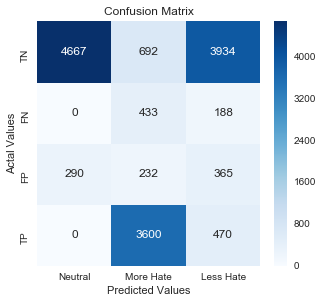

In [51]:
lr_clf=OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", lr_clf.score(X_test,y_test))
cm = multilabel_confusion_matrix(y_test, y_pred)
names = ['x', 'y', 'z']
index = pd.MultiIndex.from_product([range(s)for s in cm.shape], names=names)
cm_df= pd.DataFrame({'A': cm.flatten()}, index=index)['A']
cm_df = cm_df.unstack(level='x').swaplevel()
cm_df.columns = ['Neutral', 'More Hate', 'Less Hate']
cm_df.index=['TN','FN','FP','TP']
cm_df.index.names = ['value']
plt.figure(figsize=(5,4.5))
sns.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [22]:
from sklearn.neighbors import KNeighborsClassifier

F1 Score:  0.8182939362795478
Precision Score:  0.8340666247642992
Recall Score:  0.8031067177728465
Accuracy:  0.8198507161589671


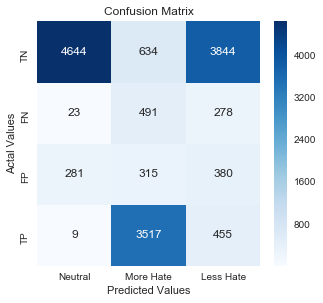

In [52]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", lr_clf.score(X_test,y_test))
cm = multilabel_confusion_matrix(y_test, y_pred)
names = ['x', 'y', 'z']
index = pd.MultiIndex.from_product([range(s)for s in cm.shape], names=names)
cm_df= pd.DataFrame({'A': cm.flatten()}, index=index)['A']
cm_df = cm_df.unstack(level='x').swaplevel()
cm_df.columns = ['Neutral', 'More Hate', 'Less Hate']
cm_df.index=['TN','FN','FP','TP']
cm_df.index.names = ['value']
plt.figure(figsize=(5,4.5))
sns.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


F1 Score:  0.8206413872349316
Precision Score:  0.8509532062391681
Recall Score:  0.7924147669961671
Accuracy:  0.8198507161589671


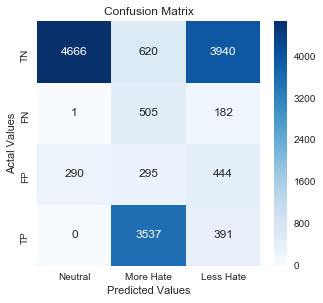

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree_model1 = DecisionTreeClassifier(max_depth = 5)
dtree_model=dtree_model1.fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", lr_clf.score(X_test,y_test))
cm = multilabel_confusion_matrix(y_test, y_pred)
names = ['x', 'y', 'z']
index = pd.MultiIndex.from_product([range(s)for s in cm.shape], names=names)
cm_df= pd.DataFrame({'A': cm.flatten()}, index=index)['A']
cm_df = cm_df.unstack(level='x').swaplevel()
cm_df.columns = ['Neutral', 'More Hate', 'Less Hate']
cm_df.index=['TN','FN','FP','TP']
cm_df.index.names = ['value']
plt.figure(figsize=(5,4.5))
sns.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()